In [1]:
from astropy.table import Table
import numpy as np
import os
from astropy.coordinates import SkyCoord
import astropy.units as u
from IPython.display import Image

Visibility first checked [here](https://observability.date/chart/object:/ra:77.337500/dec:-53.703333/date:2020-01-27/obsid:lasilla).

Coordinates were then plugged into the NOAO [Datalab](https://datalab.noao.edu/sia.php). I queried for z-band images in DES Y1 and downloaded the stack. 

I then opened the image in Aladin. I loaded the RedMapper galaxies (from Daniel) in orange. I then added a few more to the list by using the coordinate picking tool on galaxies. I tried to get the target number above 160. I did not make magnitude measurements or catalog match these additional galaxies and they all have priorites of -1. I then used the image to define skies (red), alignment stars (blue), guide stars (pink), and the SH center (yellow cross).

In [2]:
fieldname = 'rm0524-3445'

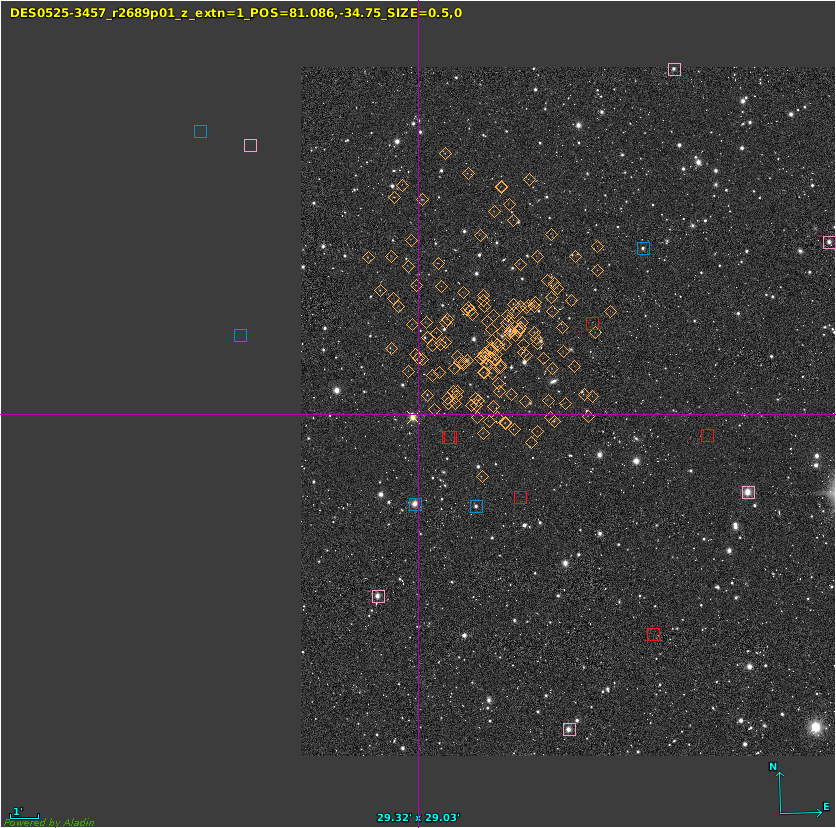

In [79]:
Image(filename=fieldname +'.png') 

In [71]:
## cluster members is table with magnitude,ra,dec,target_name columns
clustmagname = 'IMAG'
clustRAname,clustDECname = 'RA','DEC'
clustpriorityname = 'PRIORITY'
## each star is table with magnitude,ra,dec,target_name columns
starRAname,starDECname = 'RA','DEC'
## each sky is table with magnitude,ra,dec,target_name columns
skyRAname,skyDECname = 'RA','DEC'

Edit and put the following text by hand into the output field file (which you should check by eye).

In [73]:
# Field for RedMapper cluster @0524-3445.
# Galaxy Targets from DES Y1 RM catalog and with p>0.08, which together
# provide more than 99% of richness (1), then lower ranked redMaPPer
# members as fillers (0). Published SPT/ACT galaxies are low -1. CMiller
# added -1 priority targets by eye. Targets range from -1-> 100 with
# C = 100. G=A=S=1.0.

In [74]:
def make_files(fieldname,shstar,gdstars,alstars,skylocs,clustermembers):
    ids = ["GAL%03d" % x for x in np.arange(len(clustermembers))]
    with open('./'+fieldname+'.field','w') as fil:
            fil.write('Field = %s\n' % fieldname)
            fil.write('minsky = 5\n')
            fil.write('RA DEC EPOCH ID TYPE PRIORITY\n')
            fil.write('%.5f %.5f 2000.0 %s %s %0.1f\n' %(shstar['RA'],shstar['DEC'],fieldname,'C',100))
            itter = 1
            for i in range(len(gdstars)):
                fil.write('%.5f %.5f 2000.0 %s %s %0.0f\n' %(gdstars[starRAname][i],gdstars[starDECname][i],'G%02d' % itter,'G',1.0))
                itter+=1
            for i in range(len(alstars)):
                fil.write('%.5f %.5f 2000.0 %s %s %0.1f\n' %(alstars[starRAname][i],alstars[starDECname][i],'A%02d' % itter,'A',1.0))
                itter+=1
            for i in range(len(skylocs)):
                fil.write('%.5f %.5f 2000.0 %s %s %0.1f\n' %(skylocs[skyRAname][i],skylocs[skyDECname][i],'S%03d' % itter,'S',1.0))
                itter+=1
            for i in range(len(clustermembers)):
                fil.write('%.5f %.5f 2000.0 %s %s %0.1f\n' %(clustermembers[clustRAname][i],clustermembers[clustDECname][i],'T%03d' % itter,'T',clustermembers[clustpriorityname][i]))
                itter+=1

In [75]:
filename = 'redmapper_mag_jan_DESJ052420.8-344508.9.txt'
dt = [('RA', float),('DEC',float), ('IMAG',float), ('PRIORITY',int)]
clustermembers =  np.loadtxt(filename, dtype=dt,usecols = [0,1,2,3],skiprows=1)

filename = 'guide_star.txt'
dt = [('RA', float),('DEC',float)]
gdstars =  np.loadtxt(filename, dtype=dt,usecols = [0,1])

filename = 'acq_star.txt'
dt = [('RA', float),('DEC',float)]
alstars =  np.loadtxt(filename, dtype=dt,usecols = [0,1])

filename = 'sh_star.txt'
dt = [('RA', float),('DEC',float)]
shstar =  np.loadtxt(filename, dtype=dt,usecols = [0,1])
shstar = np.array(shstar[0])
filename = 'sky.txt'
dt = [('RA', float),('DEC',float)]
skylocs =  np.loadtxt(filename, dtype=dt,usecols = [0,1])

In [77]:
make_files(fieldname,shstar,gdstars,alstars,skylocs,clustermembers)

After the FIELD files go off to Mario, he runs software to place the fibers. He will send back a plate file where we can get the objects drilled (or undrilled). Below is what happened for this plate:

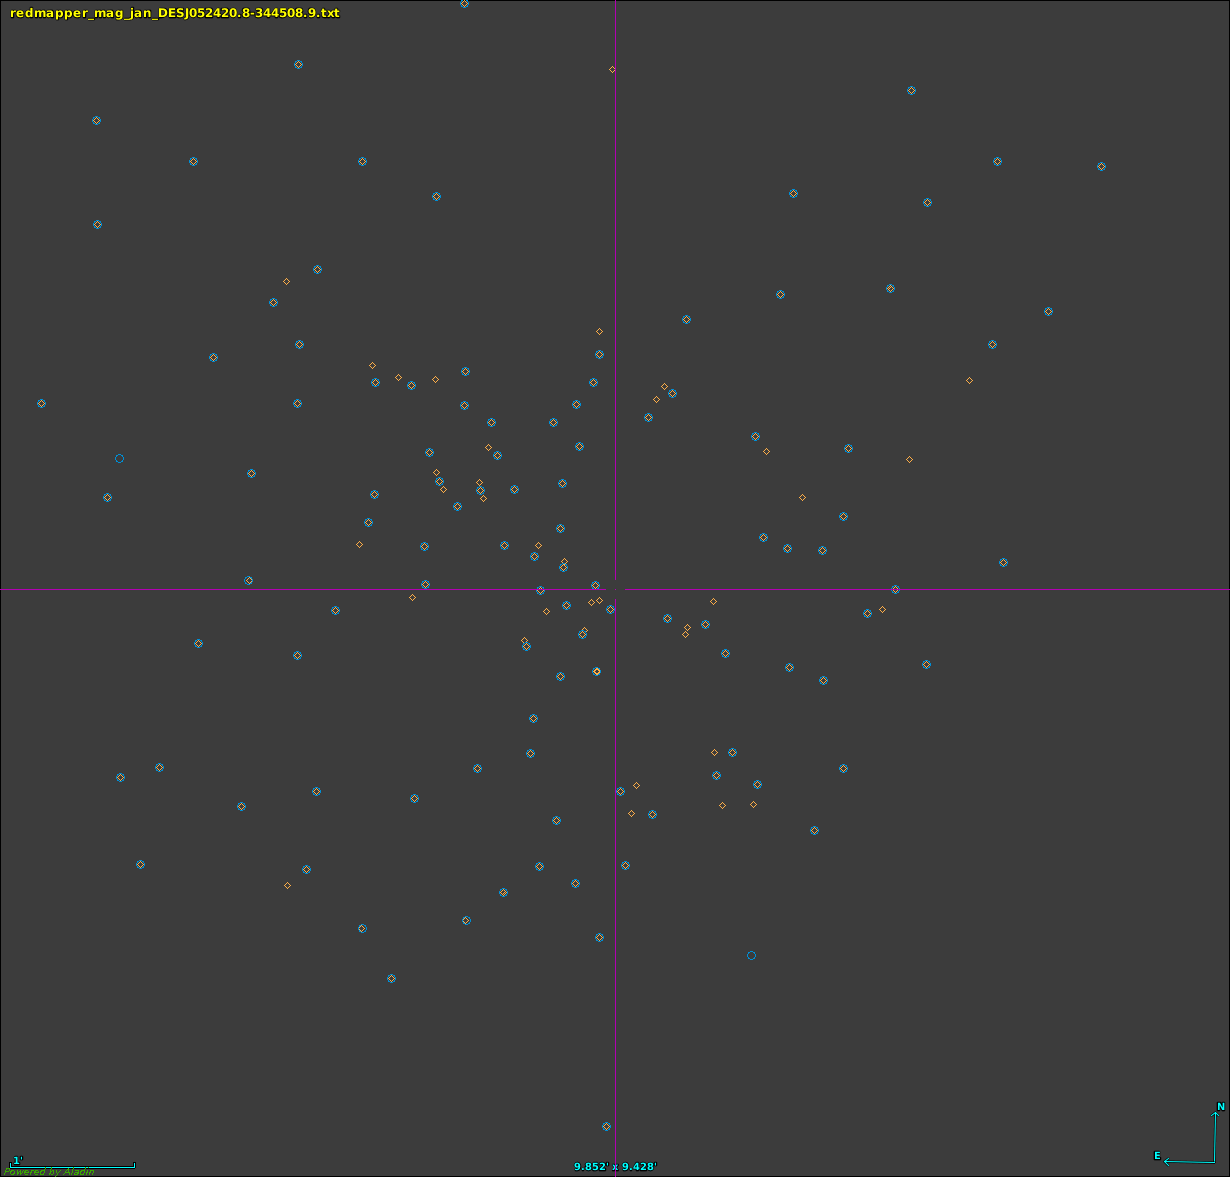

In [3]:
Image(filename=fieldname +'_drilled.png') 